    #Name: siddhant gulia                                    Student Number: N01719385

# Lab 5: Using FaceBook Prophet to Predict Future Prices

# Part #1: Lab OVERVIEW 

![image.png](images/1.png)

# IMPORT LIBRARIES AND DATASET

### You must install fbprophet package alongside all other necessary apps. First, ensure you using Python 3.74 

In [5]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [6]:
# Use the avocado.csv dataset provided for dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')



- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [9]:
# Let's view the head of the training dataset as shown below
avocado_df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
# Let's view the last elements in the training dataset as shown below
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [ ]:
# display the simple statistics summary as shown below
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
# Display the basic information as shown below
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
# Find all null values in each column/field as shown below
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# EXPLORE DATASET  

In [12]:
avocado_df = avocado_df.sort_values('Date')

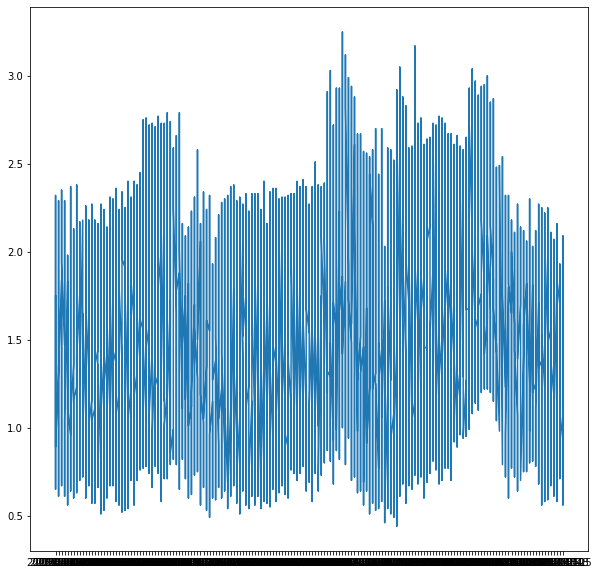

In [ ]:
# Plot date and average price shown below
# Create the plot
plt.figure()  # Adjust figure size as needed, set background to grey
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])  # Customize color

# Add labels and title
plt.xlabel('Date', fontsize=14, color='white')
plt.ylabel('Average Price', fontsize=14, color='white')
plt.title('Date and Average Price', fontsize=16, color='white')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

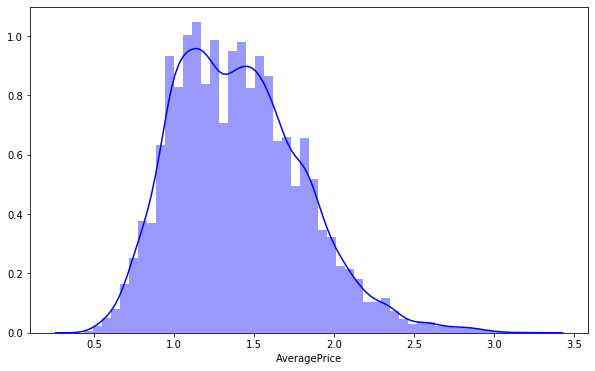

In [ ]:
# Display distPlot distribution of the average price as shown below
sns.distplot(avocado_df['AveragePrice'])
plt.xlabel('Average Price')
plt.ylabel('Density')
plt.title('Distribution of Average Price')
plt.show()

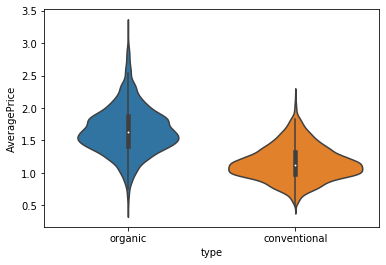

In [ ]:
# Plot a violin plot of the average price vs. avocado type as shown below
sns.violinplot(x='type', y='AveragePrice', data=avocado_df)
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.title('Average Price vs. Avocado Type')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text xticklabel objects>)

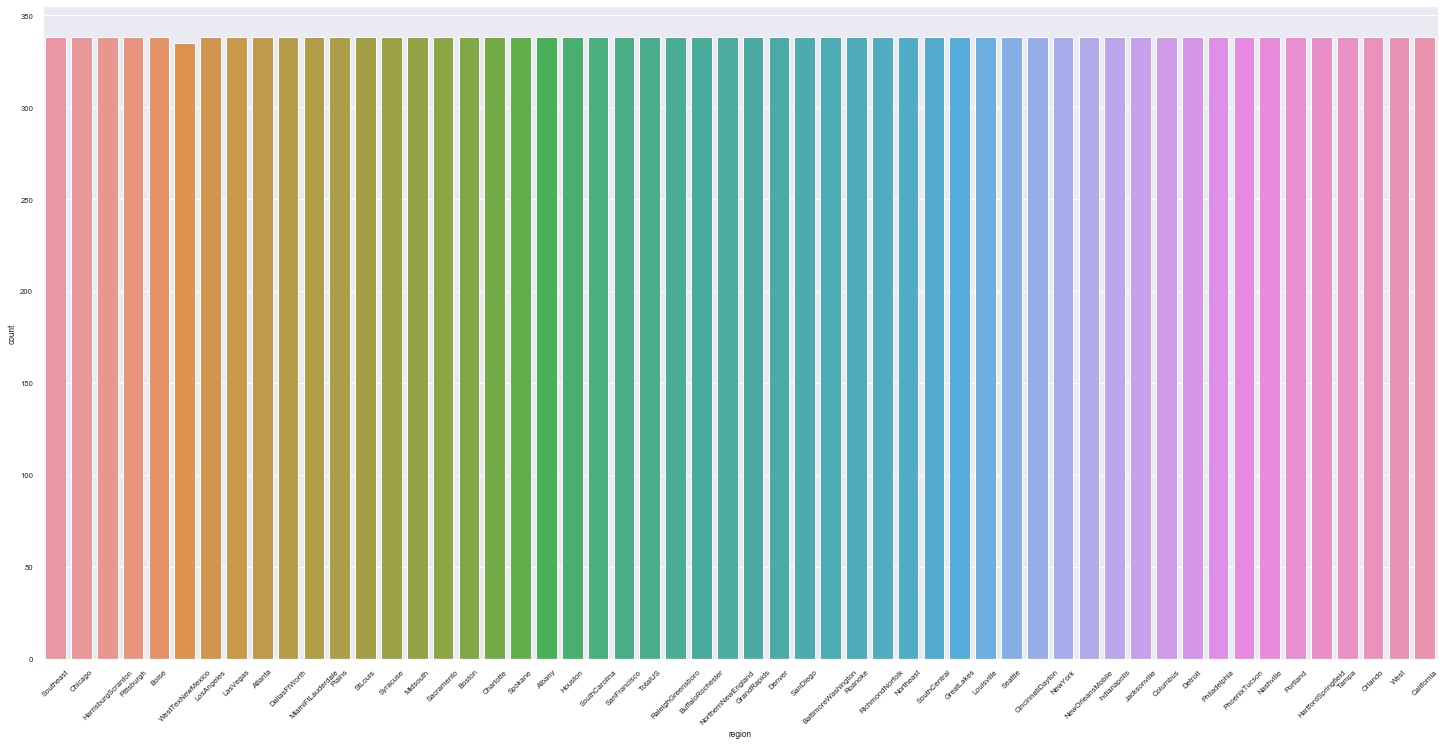

In [ ]:
# Display a Bar Chart to indicate the number of regions as shown below

region_counts = avocado_df['region'].value_counts()
plt.bar(region_counts.index, region_counts.values)
plt.show()


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

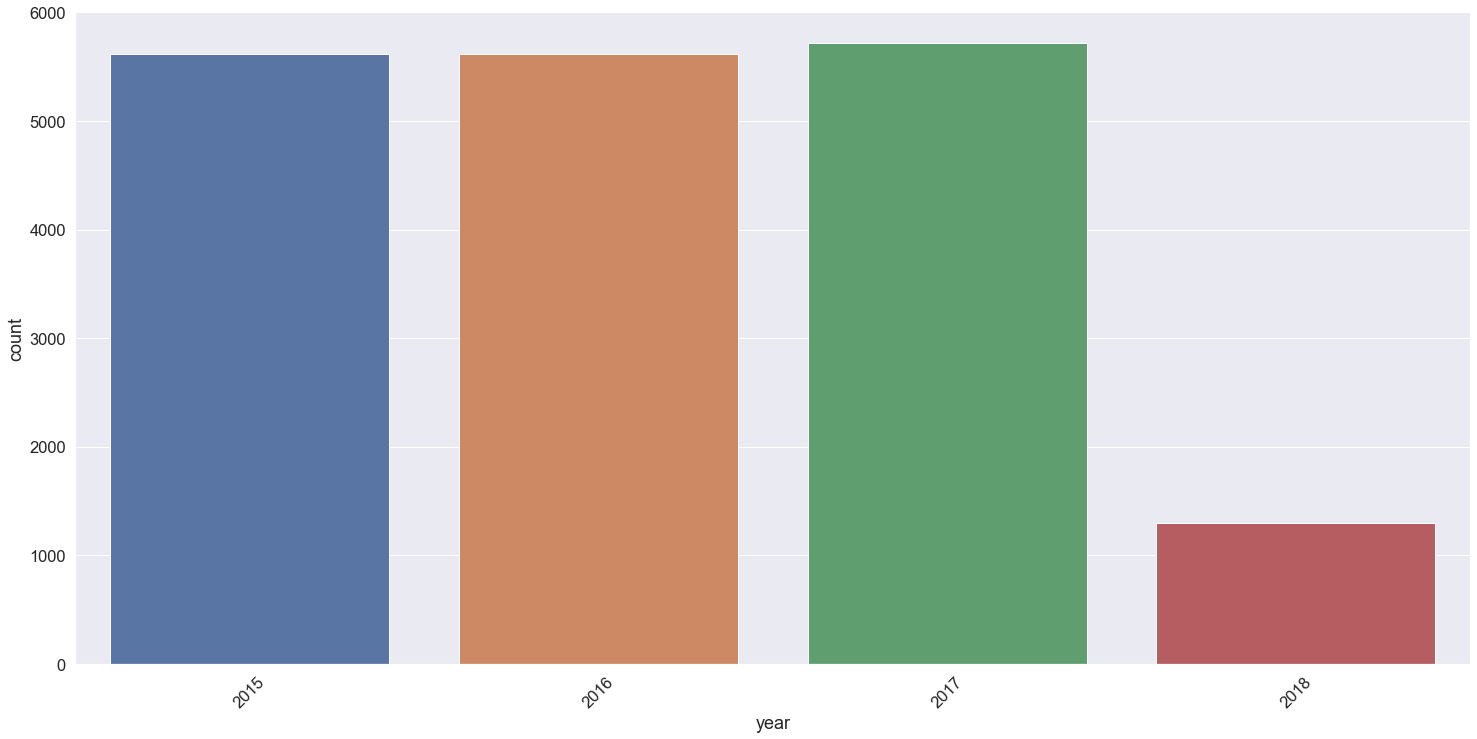

In [ ]:
# Display a Bar Chart to indicate the count in every year as shown below

year_counts = avocado_df['year'].value_counts()
plt.bar(year_counts.index, year_counts.values)
plt.show()

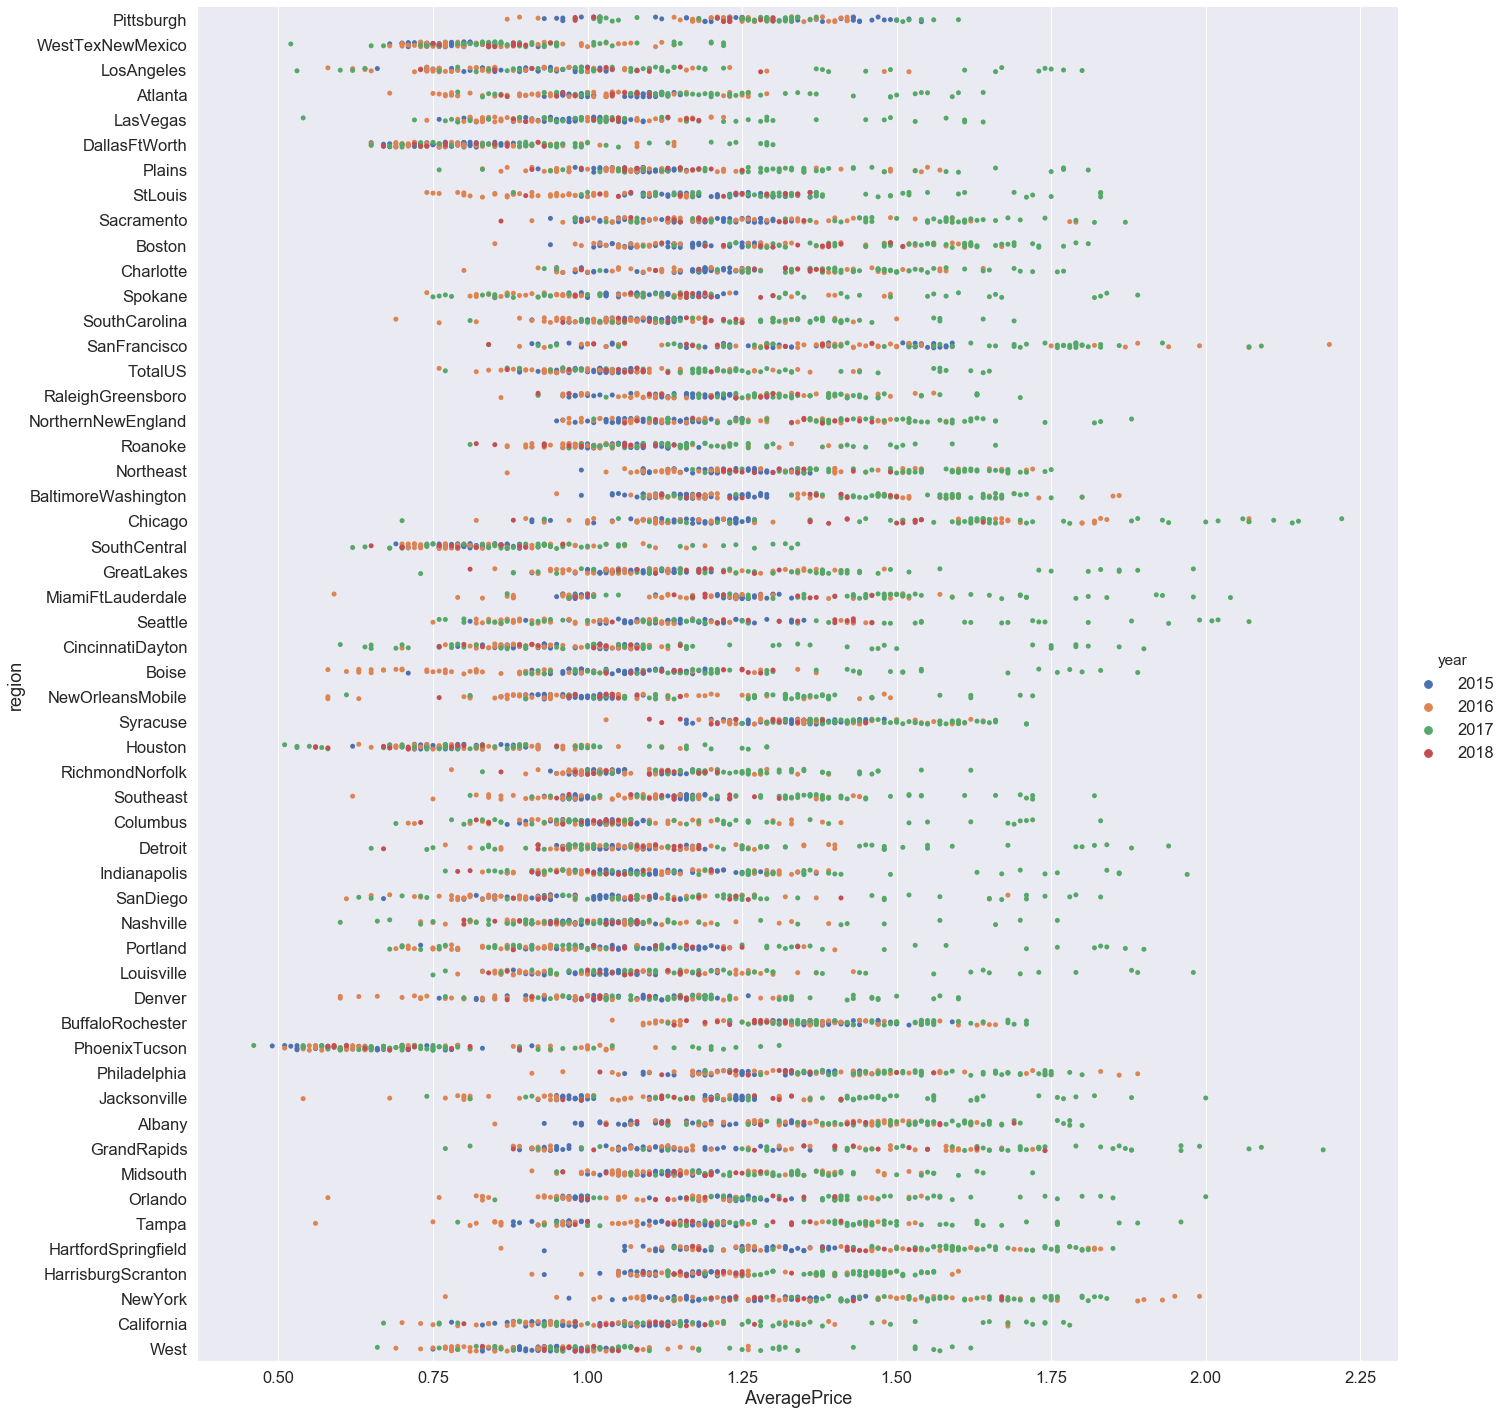

In [ ]:
 # Dispaly a plot the avocado prices vs. regions for conventional avocados as shown below

conventional_avocado_df = avocado_df[avocado_df['type'] == 'conventional']
plt.scatter(conventional_avocado_df['AveragePrice'], conventional_avocado_df['region'])
plt.show()


In [ ]:
# Prepare and Print out the dataset as shown below
# Select the relevant columns
df_prophet = avocado_df[['Date', 'AveragePrice']]

df_prophet



,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [ ]:
# # Transform and display the dataset as shown below readying it to use the facebook prophet

df_prophet = df_prophet.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

# Display the transformed dataset
df_prophet

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


![image.png](images/2.png)

![image.png](images/3.png)

![image.png](images/4.png)

# Part 6: DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [28]:
# Develop the facebook prophet model here and fit it into the dataset
# Initialize the Prophet model
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

model = Prophet()

# Fit the model to the dataset
model.fit(df_prophet)

23:44:47 - cmdstanpy - INFO - Chain [1] start processing
23:44:54 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
# Forcasting into the future using the model you created above
# Create a dataframe to hold predictions for the next 365 days
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Display the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,1.382394,0.914553,1.874061
1,2015-01-11,1.385583,0.897521,1.877612
2,2015-01-18,1.380713,0.890588,1.886975
3,2015-01-25,1.356655,0.878208,1.846144
4,2015-02-01,1.323352,0.834768,1.793208
...,...,...,...,...
529,2019-03-21,1.080679,0.542920,1.611662
530,2019-03-22,1.081751,0.509284,1.585081
531,2019-03-23,1.083100,0.561969,1.610888
532,2019-03-24,1.084708,0.591624,1.648600


In [ ]:
# # Display the forcast as shown below
forecast[['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat']]


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497917,0.925538,1.840734,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
1,2015-01-04,1.497917,0.927119,1.867234,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
2,2015-01-04,1.497917,0.910617,1.855966,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
3,2015-01-04,1.497917,0.886021,1.851858,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
4,2015-01-04,1.497917,0.899580,1.869785,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.161737,0.542743,1.617470,0.986845,1.367618,-0.086289,-0.086289,-0.086289,-0.086289,-0.086289,-0.086289,0.0,0.0,0.0,1.075448
18610,2019-03-22,1.161007,0.544087,1.573618,0.985926,1.367777,-0.084622,-0.084622,-0.084622,-0.084622,-0.084622,-0.084622,0.0,0.0,0.0,1.076384
18611,2019-03-23,1.160276,0.517756,1.590230,0.984971,1.367937,-0.082682,-0.082682,-0.082682,-0.082682,-0.082682,-0.082682,0.0,0.0,0.0,1.077594
18612,2019-03-24,1.159545,0.543165,1.621779,0.983652,1.368097,-0.080489,-0.080489,-0.080489,-0.080489,-0.080489,-0.080489,0.0,0.0,0.0,1.079056


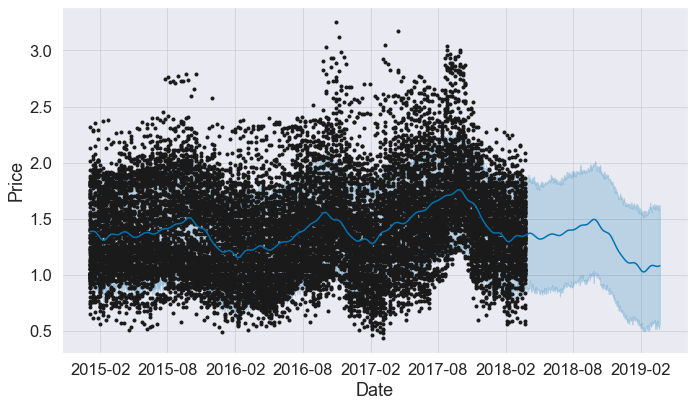

In [ ]:
# Print the below plot
fig1 = model.plot(forecast)
plt.show()

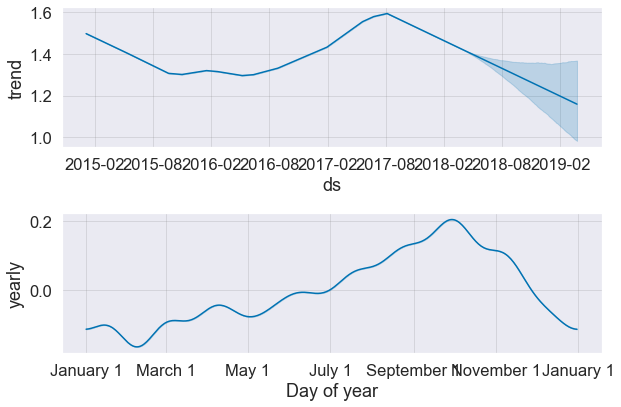

In [ ]:
# Display the trend, yearly and weekly components as shown below
# Print the components plot (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.show()

In [33]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')

In [34]:
# Using the original dataset, Select and create a dataframe for West region
west_region_df = avocado_df[avocado_df['region'] == 'West']
west_region_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West


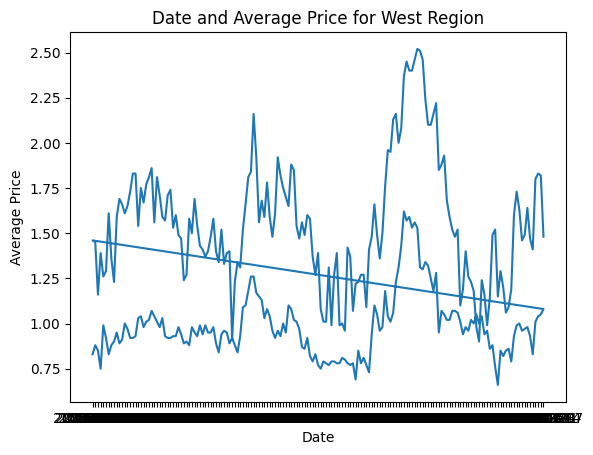

C:\Users\siddh\AppData\Local\Temp\ipykernel_12832\2629613113.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(west_region_df['AveragePrice'])


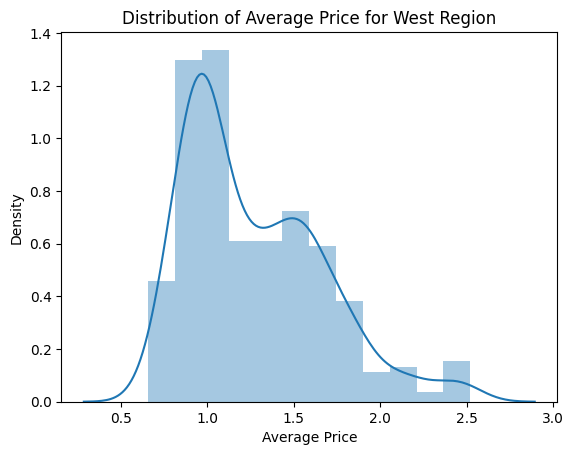

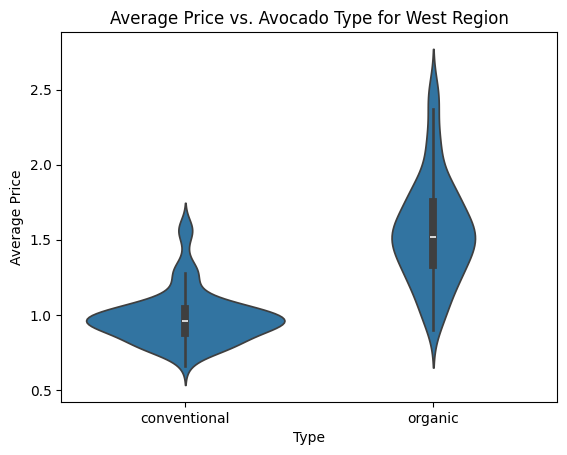

In [35]:
# Prepare and display the below plots using the West region dataframe
# Plot date and average price for the West region
plt.figure()
plt.plot(west_region_df['Date'], west_region_df['AveragePrice'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Date and Average Price for West Region')
plt.show()

# Display distPlot distribution of the average price for the West region
sns.distplot(west_region_df['AveragePrice'])
plt.xlabel('Average Price')
plt.ylabel('Density')
plt.title('Distribution of Average Price for West Region')
plt.show()

# Plot a violin plot of the average price vs. avocado type for the West region
sns.violinplot(x='type', y='AveragePrice', data=west_region_df)
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.title('Average Price vs. Avocado Type for West Region')
plt.show()

In [ ]:
# # convert the dataframe into facebook prophet format and display it as shown below

west_region_prophet_df = west_region_df[['Date', 'AveragePrice']]

# Rename the columns to fit Prophet's requirements
west_region_prophet_df = west_region_prophet_df.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

# Display the transformed dataset
west_region_prophet_df

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18227,2,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [ ]:
# create the facebook prophet model, fit it into the dataset and create future forecast
# Initialize the Prophet model
# # convert the dataframe into facebook prophet format and display it as shown below

# Fit the model to the West region dataset
model_west.fit(west_region_prophet_df)

# Create a dataframe to hold predictions for the next 365 days
future_west = model_west.make_future_dataframe(periods=365)

# Make predictions
forecast_west = model_west.predict(future_west)

# Display the forecast
forecast_west[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

23:50:11 - cmdstanpy - INFO - Chain [1] start processing
23:50:11 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,1.059827,0.617417,1.472248
1,2015-01-11,1.078576,0.661096,1.496660
2,2015-01-18,1.086921,0.663822,1.559980
3,2015-01-25,1.073391,0.637572,1.502360
4,2015-02-01,1.050154,0.637861,1.466550
...,...,...,...,...
529,2019-03-21,1.531297,1.090247,1.958113
530,2019-03-22,1.536962,1.112041,1.993713
531,2019-03-23,1.543192,1.123665,1.970619
532,2019-03-24,1.549883,1.153948,1.989344


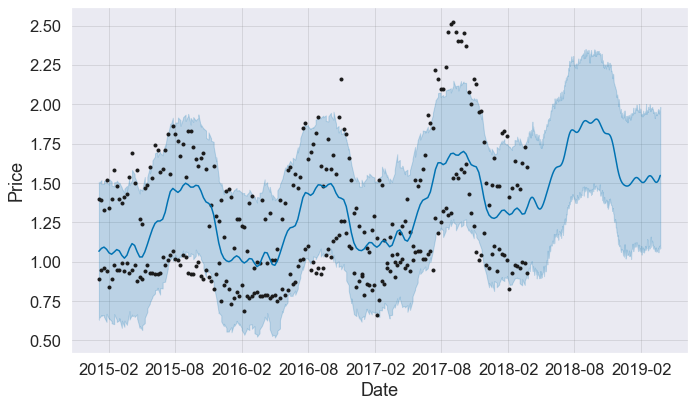

In [ ]:
# Create and Diplay the below plot
fig_west = model_west.plot(forecast_west)
plt.show()

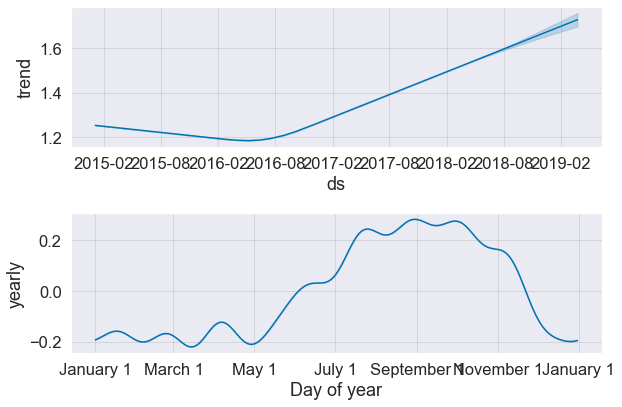

In [ ]:
# Display the trend, yearly and weekly components for the Western region as shown below
fig2 =model_west.plot_components(forecast_west)
plt.show()
